In [159]:
import numpy as np
from scipy.signal import lfilter
import matplotlib.pyplot as plt

In [175]:
def lpc(x):
    r_p = np.correlate(x, x, "full")
    return r_p

In [176]:
def toeplitz(x, M):
    covmatrix = np.zeros((M,M))
    for i in range(0,M):
        covmatrix[[i],i:M] = np.array(x[0:M-i]).T
        covmatrix[i:M,i] = x[0:M-i]
    return covmatrix

In [199]:
t = np.linspace(-1, 1, 50000)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +
     0.1*np.sin(2*np.pi*1.25*t + 1) +
     0.18*np.cos(2*np.pi*3.85*t))
xn = x + np.random.randn(len(t)) * 0.08

In [200]:
x = lfilter(np.ones(4), [1, 1/2, 1/3, 1/4], xn)
x = x[len(x)-4096:len(x)]

In [201]:
lag = 3
r_p = lpc(x.flatten())
r_0 = len(r_p)//2 + 1
print(r_0)
r_p = r_p[r_0:r_0+lag+1]
covmatrix = toeplitz(r_p, lag+1)
Acoeffs,resid,rank,s = np.linalg.lstsq((covmatrix),-1*np.array(r_p), rcond=None)
print(Acoeffs)
est_x = lfilter((np.append(0, Acoeffs[1:])), 1, x)
print(est_x)

4096
[-1.00000000e+00 -1.41826627e-13 -1.12244512e-13  9.00740951e-14]
[ 0.00000000e+00 -1.46940815e-13 -2.59955392e-13 ... -3.33878111e-13
 -3.15582720e-13 -3.11708210e-13]


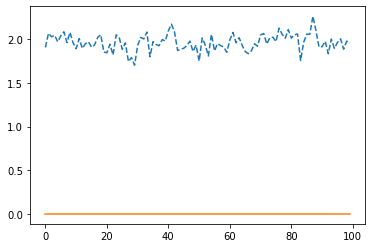

In [202]:
plt.plot(x[len(x)-100:len(x)], '--')
plt.plot(est_x[len(x)-100:len(x)])